In [227]:
# Dependencies
from citipy import citipy
import random
import numpy as np
import openweathermapy.core as owm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import datetime
import time
import seaborn as sns

#config
from config import api_key

In [228]:
#Set latitude and longitude coordinates range
lat_range = np.arange(-90, 90, 5)
lon_range = np.arange(-200, 200, 5)

#New data frame for holding random coordinates
coordinates_df = pd.DataFrame()
coordinates_df["Latitude"] = ""
coordinates_df["Longitude"] = ""

#Generate latitude and longiture coordinates and put in coordintes_df
for x in lat_range:
    for y in lon_range:
        x_coord = list(np.arange(x, x+5, 0.01))
        y_coord = list(np.arange(y, y+5, 0.01))
        lat_values = random.sample(x_coord, 10)
        lon_values = random.sample(y_coord, 10)
        lat_samples = [(x + r) for r in lat_values]
        lon_samples = [(y + s) for s in lon_values]
        coordinates_df = coordinates_df.append(pd.DataFrame.from_dict({
            "Latitude": lat_samples,
            "Longitude": lon_samples
        }))
coordinates_df = coordinates_df.reset_index(drop=True)
coordinates_df.head()

,Latitude,Longitude
0,-176.30,-396.50
1,-177.76,-395.24
2,-176.55,-399.50
3,-176.97,-397.97
4,-179.36,-398.72


In [229]:
#Create 2 new columns to pick up the nearest city and country code based on coordinates of latitude and longitude
coordinates_df["City"] = ""
coordinates_df["Country"] = ""
for index, row in coordinates_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    coordinates_df.set_value(index, "City", city.city_name)
    coordinates_df.set_value(index, "Country", city.country_code)

coordinates_df.head()

C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Latitude,Longitude,City,Country
0,-176.30,-396.50,vaini,to
1,-177.76,-395.24,vaini,to
2,-176.55,-399.50,vaini,to
3,-176.97,-397.97,vaini,to
4,-179.36,-398.72,vaini,to


In [230]:
#Remove Latitude and Longitude columns and duplicate cities
clean_coordinates_df = coordinates_df.drop(["Latitude", "Longitude"], axis=1)
clean_coordinates_df
clean_coordinates_df = clean_coordinates_df.drop_duplicates()
clean_coordinates_df.head()

,City,Country
0,vaini,to
222,mataura,pf
240,punta arenas,cl
251,ushuaia,ar
410,bredasdorp,za


In [231]:
random_cities = clean_coordinates_df.sample(1000)
random_cities = random_cities.reset_index(drop=True)
random_cities

,City,Country
0,tyrma,ru
1,harper,lr
2,sao goncalo do amarante,br
3,irtyshskiy,ru
4,puerto escondido,mx
5,baykit,ru
6,kyren,ru
7,east london,za
8,cajabamba,pe
9,ngunguru,nz


In [232]:
#Use api from openweathermap.org to pull the weather information using city match
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {"units": "Imperial", "APPID": api_key}
row_count = 1
for index, row in random_cities.iterrows():
    params["q"] = row["City"]
    print("Processing Record " + str(row_count) + " | " + f"{row['City']}")
    row_count += 1
    weather_response = requests.get(base_url, params=params)
    print(weather_response.url)
    weather_response = weather_response.json()
    try:
        date = weather_response["sys"]["sunset"]
        cloud = weather_response["clouds"]["all"]
        humidity = weather_response["main"]["humidity"]
        latitude = weather_response["coord"]["lat"]
        longitude = weather_response["coord"]["lon"]
        max_temp = weather_response["main"]["temp_max"]
        wind_speed = weather_response["wind"]["speed"]
        date_revised = datetime.datetime.fromtimestamp(int(date)).strftime('%Y-%m-%d')
        random_cities.set_value(index, "Date", date_revised)
        random_cities.set_value(index, "Cloudiness", cloud)
        random_cities.set_value(index, "Humidity", humidity)
        random_cities.set_value(index, "Lat", latitude)
        random_cities.set_value(index, "Lon", longitude)
        random_cities.set_value(index, "Max Temp", max_temp)
        random_cities.set_value(index, "Wind Speed", wind_speed)
        
    except (KeyError, IndexError):
        print("Error with city data. Skipping.")
        continue


Processing Record 1 | tyrma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=tyrma
Processing Record 2 | harper


C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: set_value is deprecated and will be removed in a future rele

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=harper
Processing Record 3 | sao goncalo do amarante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sao+goncalo+do+amarante
Processing Record 4 | irtyshskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=irtyshskiy
Processing Record 5 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=puerto+escondido
Processing Record 6 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=baykit
Processing Record 7 | kyren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kyren
Processing Record 8 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=aksu
Processing Record 60 | buesaco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=buesaco
Processing Record 61 | churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=churapcha
Processing Record 62 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=rio+grande
Processing Record 63 | morshansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=morshansk
Processing Record 64 | pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pringsewu
Processing Record 65 | bull savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bull+savanna
Processing R

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=douglas
Processing Record 116 | pokhara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pokhara
Processing Record 117 | las cruces
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=las+cruces
Processing Record 118 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=vostok
Processing Record 119 | gua musang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=gua+musang
Processing Record 120 | urambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=urambo
Processing Record 121 | progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=progreso
Processing Record 122

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=lop+buri
Processing Record 174 | araxa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=araxa
Processing Record 175 | san
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=san
Processing Record 176 | pilar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pilar
Processing Record 177 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kieta
Processing Record 178 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=half+moon+bay
Processing Record 179 | bridgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bridgetown
Processing Record 180 | verkhnya

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=chaoyang
Processing Record 230 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=naze
Processing Record 231 | sembe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sembe
Error with city data. Skipping.
Processing Record 232 | birin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=birin
Processing Record 233 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=belaya+gora
Processing Record 234 | jianhu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=jianhu
Processing Record 235 | tullow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=tullow
Processi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=thinadhoo
Processing Record 286 | kerema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kerema
Processing Record 287 | rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=rosetta
Processing Record 288 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=leningradskiy
Processing Record 289 | mullaitivu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=mullaitivu
Error with city data. Skipping.
Processing Record 290 | nyandoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=nyandoma
Processing Record 291 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sao+borja
Processing Record 343 | zaranj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=zaranj
Processing Record 344 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=aswan
Processing Record 345 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=lagoa
Processing Record 346 | werda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=werda
Processing Record 347 | xuanhua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=xuanhua
Processing Record 348 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=rungata
Error with city data. Skipping.
Processing 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bereda
Processing Record 399 | bokspits
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bokspits
Error with city data. Skipping.
Processing Record 400 | general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=general+roca
Processing Record 401 | prachuap khiri khan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=prachuap+khiri+khan
Processing Record 402 | beatrice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=beatrice
Processing Record 403 | edd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=edd
Processing Record 404 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1fae

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=floro
Processing Record 454 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=quatre+cocos
Processing Record 455 | kawana waters
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kawana+waters
Error with city data. Skipping.
Processing Record 456 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=nizhniy+kuranakh
Processing Record 457 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pisco
Processing Record 458 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=puerto+ayacucho
Processing Record 459 | bilopillya
http://api.openweathermap.org/data/2.5/weather?units=Impe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=juli
Processing Record 509 | prince albert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=prince+albert
Processing Record 510 | zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=zhangye
Processing Record 511 | sheridan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sheridan
Processing Record 512 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=adrar
Processing Record 513 | rena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=rena
Processing Record 514 | hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=hauterive
Processing Record 515 | lo

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=borogontsy
Processing Record 564 | pereleshinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pereleshinskiy
Processing Record 565 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pacific+grove
Processing Record 566 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=ixtapa
Processing Record 567 | kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kijang
Processing Record 568 | edea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=edea
Processing Record 569 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=butaritari
Proces

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=ripky
Processing Record 620 | muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=muli
Processing Record 621 | kigorobya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kigorobya
Processing Record 622 | tulun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=tulun
Processing Record 623 | platonovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=platonovka
Error with city data. Skipping.
Processing Record 624 | sikonge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sikonge
Processing Record 625 | pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pasni
Proce

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=koshurnikovo
Processing Record 676 | modasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=modasa
Processing Record 677 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bambous+virieux
Processing Record 678 | filingue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=filingue
Processing Record 679 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=mitsamiouli
Processing Record 680 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=camacha
Processing Record 681 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=ha

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=ponta+do+sol
Processing Record 731 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=ostrovnoy
Processing Record 732 | matadi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=matadi
Processing Record 733 | pishva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=pishva
Processing Record 734 | aleksandrovsk-sakhalinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=aleksandrovsk-sakhalinskiy
Processing Record 735 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=ust-kuyga
Processing Record 736 | carapegua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=santa
Processing Record 786 | loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=loandjili
Processing Record 787 | puerto quijarro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=puerto+quijarro
Processing Record 788 | san fernando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=san+fernando
Processing Record 789 | katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=katherine
Processing Record 790 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sorong
Processing Record 791 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=cayenne
P

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=trat
Processing Record 842 | graham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=graham
Processing Record 843 | tsalenjikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=tsalenjikha
Processing Record 844 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=cheuskiny
Error with city data. Skipping.
Processing Record 845 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=saint+george
Processing Record 846 | aktau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=aktau
Processing Record 847 | morrinhos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a970245807

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=mar+del+plata
Processing Record 897 | sitio novo do tocantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=sitio+novo+do+tocantins
Error with city data. Skipping.
Processing Record 898 | banikoara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=banikoara
Processing Record 899 | bucksport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bucksport
Processing Record 900 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=halalo
Error with city data. Skipping.
Processing Record 901 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=manokwari
Processing Record 902 | zakamensk
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=hof
Processing Record 953 | orsha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=orsha
Processing Record 954 | kontagora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=kontagora
Processing Record 955 | trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=trelew
Processing Record 956 | hihya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=hihya
Processing Record 957 | bardiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=bardiyah
Error with city data. Skipping.
Processing Record 958 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00af1faec35bbc112a9702458071ca0f&q=faya
Processing Re

In [235]:
#Table test
random_cities['City'] = random_cities['City'].str.capitalize()
random_cities['Country'] = random_cities['Country'].str.upper()
random_cities.head()

C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\hongk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,City,Country,Date,Cloudiness,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Tyrma,RU,2018-04-05,48.0,36.0,50.04,132.17,28.17,9.57
1,Harper,LR,2018-04-05,90.0,44.0,30.30,-99.24,60.80,6.93
2,Sao goncalo do amarante,BR,2018-04-05,0.0,88.0,-3.61,-38.97,78.80,2.24
3,Irtyshskiy,RU,2018-04-05,8.0,88.0,58.33,68.13,35.55,8.57
4,Puerto escondido,MX,2018-04-05,12.0,100.0,15.86,-97.07,81.90,3.20


In [237]:
#Delete rows with missing data
random_cities = random_cities.dropna()
random_cities.to_csv("City_Weather.csv")
random_cities

,City,Country,Date,Cloudiness,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Tyrma,RU,2018-04-05,48.0,36.0,50.04,132.17,28.17,9.57
1,Harper,LR,2018-04-05,90.0,44.0,30.30,-99.24,60.80,6.93
2,Sao goncalo do amarante,BR,2018-04-05,0.0,88.0,-3.61,-38.97,78.80,2.24
3,Irtyshskiy,RU,2018-04-05,8.0,88.0,58.33,68.13,35.55,8.57
4,Puerto escondido,MX,2018-04-05,12.0,100.0,15.86,-97.07,81.90,3.20
5,Baykit,RU,2018-04-05,80.0,75.0,61.68,96.39,17.37,10.47
6,Kyren,RU,2018-04-05,56.0,50.0,51.68,102.13,17.37,2.42
7,East london,ZA,2018-04-05,0.0,88.0,-33.02,27.91,68.00,6.93
8,Cajabamba,PE,2018-04-05,92.0,97.0,-1.70,-78.77,45.72,1.41
9,Ngunguru,NZ,2018-04-04,0.0,93.0,-35.62,174.50,69.66,13.82


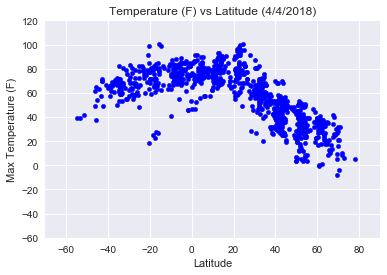

Conclusion: Based on our sample, we have reason to believe that as the latitude north of the equator contains temperatures that have more dramatic different as compared to the south as of April.


In [247]:
#Scatter plot for Temperature (F) vs Latitude
random_cities.plot(kind="scatter", x="Lat", y="Max Temp", color="blue")
sns.set()
plt.title("Temperature (F) vs Latitude (4/4/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim([-70, 90])
plt.ylim([-60, 120])
plt.show()
print("Conclusion: Based on our sample, we have reason to believe that as the latitude north of the equator contains temperatures that have more dramatic different as compared to the south as of April.")
plt.savefig("Temperature_vs_Latitude.png")

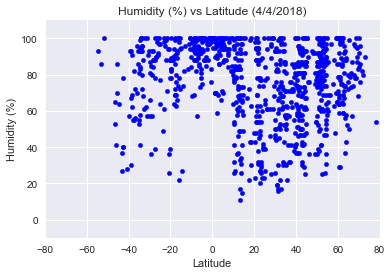

Conclusion: Based on our sample, we have reason to believe that cities closer to the equator has higher humidity than cities away from the equator.


In [251]:
#Scatter plot for Humidity (%) vs Latitude
random_cities.plot(kind="scatter", x="Lat", y="Humidity", color="blue")
sns.set()
plt.title("Humidity (%) vs Latitude (4/4/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim([-80, 80])
plt.ylim([-10, 110])
plt.show()
print("Conclusion: Based on our sample, we have reason to believe that cities closer to the equator has higher humidity than cities away from the equator.")
plt.savefig("Humidity_vs_Latitude.png")

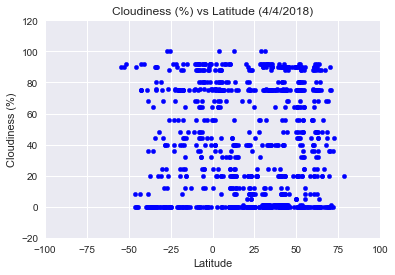

Conclusion: Based on our sample, we have reason to believe that latitude has no influence on cloudiness of the city. However, there are more cities on earth with no cloudiness for April.


In [253]:
#Scatter plot for Humidity (%) vs Latitude
random_cities.plot(kind="scatter", x="Lat", y="Cloudiness", color="blue")
sns.set()
plt.title("Cloudiness (%) vs Latitude (4/4/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim([-100, 100])
plt.ylim([-20, 120])
plt.show()
print("Conclusion: Based on our sample, we have reason to believe that latitude has no influence on cloudiness of the city. However, there are more cities on earth with no cloudiness for April.")
plt.savefig("Cloudiness_vs_Latitude.png")

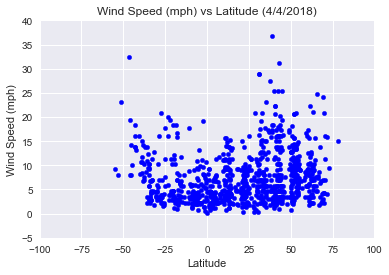

Conclusion: Based on our sample, we have reason to believe that there is less wind speed difference between cities as cities are closer to the equator.


In [258]:
#Scatter plot for Wind Speed (mph) vs Latitude
random_cities.plot(kind="scatter", x="Lat", y="Wind Speed", color="blue")
sns.set()
plt.title("Wind Speed (mph) vs Latitude (4/4/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim([-100, 100])
plt.ylim([-5, 40])
plt.show()
print("Conclusion: Based on our sample, we have reason to believe that there is less wind speed difference between cities as cities are closer to the equator.")
plt.savefig("Wind_Speed_vs_Latitude.png")